In [173]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')
import requests
from pandas.io.json import json_normalize
import math
import random
import decimal
import scipy.linalg
import numpy.random as nrand

In [174]:
## BITCOIN
b=requests.get('https://www.quandl.com/api/v3/datasets/BCHARTS/BITSTAMPUSD')
A=json_normalize(b.json())
data= A['dataset.data'].all()
df = pd.DataFrame(data)
df.columns=A['dataset.column_names'].all()
date=df['Date']
# date=date[::-1]
# date.index= range(0,len(date))
# #df.index= df.Date
# #df=df.reindex(index=df.index[::-1])
# del df['Open'],df['High'],df['Low'],df['Volume (Currency)'],df['Date']
# prices=df['Close']
# prices.head()

#df.reindex(index=range(0,len(date)))
b=requests.get('https://www.quandl.com/api/v3/datasets/BCHARTS/BITSTAMPUSD')
A=json_normalize(b.json())
data= A['dataset.data'].all()
df = pd.DataFrame(data)
df.columns=A['dataset.column_names'].all()
date=df['Date']
# date=date[::-1]
# date.index= range(0,len(date))
# #df.index= df.Date
# #df=df.reindex(index=df.index[::-1])
# del df['Open'],df['High'],df['Low'],df['Volume (Currency)'],df['Date']
# prices=df['Close']
# prices.head()
df=df[::-1]
#df.reindex(index=range(0,len(date)))
df.index= range(0,len(date))

df.head()

,Date,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
0,2011-09-13,5.80,6.00,5.65,5.97,58.371382,346.097389,5.929231
1,2011-09-14,5.58,5.72,5.52,5.53,61.145984,341.854813,5.590798
2,2011-09-15,5.12,5.24,5.00,5.13,80.140795,408.259002,5.094272
3,2011-09-16,4.82,4.87,4.80,4.85,39.914007,193.763147,4.854515
4,2011-09-17,4.87,4.87,4.87,4.87,0.300000,1.461000,4.870000


In [175]:
#prices.Timestamp = pd.to_datetime(prices.Timestamp, unit='s')
prices=df[['Date','Weighted Price']]
import datetime
prices['Date']=pd.to_datetime(prices['Date'], format='%Y/%m/%d')
prices.index=prices['Date']
prices=prices[["Weighted Price"]]
prices.head()

,Weighted Price
Date,
2011-09-13,5.929231
2011-09-14,5.590798
2011-09-15,5.094272
2011-09-16,4.854515
2011-09-17,4.870000


In [176]:
## ETHER 
b=requests.get('https://poloniex.com/public?command=returnChartData&currencyPair=BTC_ETH&start=1435699200&end=9999999999&period=14400')
A=json_normalize(b.json())
ether=A[['date','close','quoteVolume','volume']]
ether.head()
ether.date = pd.to_datetime(ether.date, unit='s')
A.head()

,close,date,high,low,open,quoteVolume,volume,weightedAverage
0,0.004555,1439006400,50.000000,0.004500,50.000000,54434.780924,329.649378,0.006056
1,0.005350,1439020800,0.005488,0.004225,0.005278,62325.494919,304.983198,0.004893
2,0.004621,1439035200,0.005840,0.004324,0.005101,30462.689907,145.251297,0.004768
3,0.003070,1439049600,0.004770,0.002620,0.004621,74319.505974,272.400189,0.003665
4,0.003125,1439064000,0.003870,0.002900,0.003070,44663.608672,153.519259,0.003437


In [177]:

# Resampling to daily frequency
prices_daily = prices.resample('d').mean()

# Resampling to monthly frequency
prices_month = prices.resample('M').mean()
# Resampling to annual frequency
prices_annual = prices.resample('A-DEC').mean()

# Resampling to quarterly frequency
prices_Q = prices.resample('Q-DEC').mean()

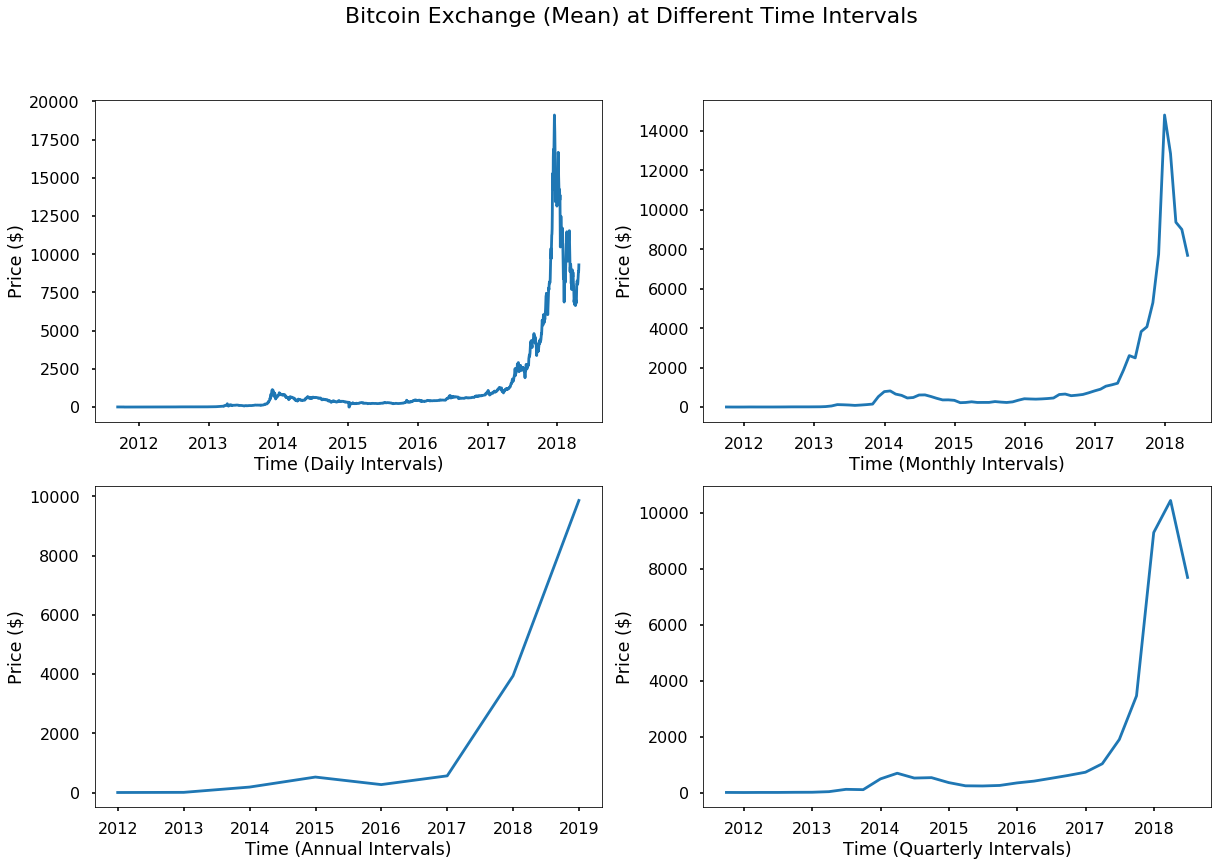

In [178]:
fig = plt.figure(figsize=[20, 13])
plt.suptitle('Bitcoin Exchange (Mean) at Different Time Intervals ', fontsize=22)

plt.subplot(221)
plt.plot(prices_daily['Weighted Price'])
plt.ylabel('Price ($)')
plt.xlabel('Time (Daily Intervals)')
plt.subplot(222)
plt.plot(prices_month['Weighted Price'])
plt.ylabel('Price ($)')
plt.xlabel('Time (Monthly Intervals)')
plt.subplot(223)
plt.plot(prices_annual['Weighted Price'])
plt.ylabel('Price ($)')
plt.xlabel('Time (Annual Intervals)')
plt.subplot(224)
plt.plot(prices_Q['Weighted Price'])
plt.ylabel('Price ($)')
plt.xlabel('Time (Quarterly Intervals)')
plt.show()

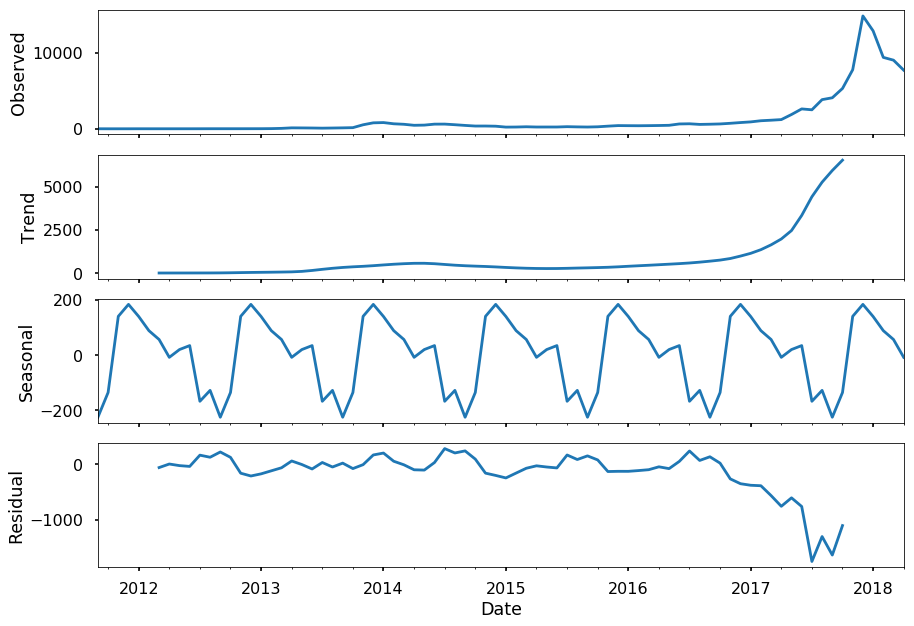

In [179]:
sm.tsa.seasonal_decompose(prices_month['Weighted Price']).plot()
plt.show()

Non-Stationary Data is data that has constantly changing mean, variance, and covariances over time. (Trends, cycles, random walks (Brownian Motion Approximation) 

Random Walk= Y[t]=Y[t-1] + E. Variance approaches infinity W/R to time with E being a distributed white noise stoichastic characteristic 

Random Walk with Drift = Y[t]=Y[t-1] + E + a, a= drift

Deterministic Trend = Y[t]= Bt + E + a: 

Dicky-Fuller: Ho = Data is Non Stationary (there is a unit root). Reject null Hypothesis when P<.05 (Stationary) 
https://stats.stackexchange.com/questions/29121/intuitive-explanation-of-unit-root

Detrending and development of a Stationary Relationship:
Y[t]- Y[t-1] = E + a

Y[t]- Bt = E + a:

BoxCox Tranforms: Creating a Normal Shape for Datum 

In [180]:
#Normalize the month price data 
prices_month['Weighted_Price_box'], lmbda = stats.boxcox(prices_month['Weighted Price'])
#Determine if this Data is Stationary 
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(prices_month['Weighted Price'])[1])
#non stationary 

Dickey–Fuller test: p=0.995697


In [181]:
## Converting to Stationary Data and then Re-examing with Stationary Test
n=12 # 12 month differentiation
#Y[t]- Y[t-1] = E (normal) + a
prices_month['prices_box_diff'] = prices_month['Weighted_Price_box'] - prices_month.Weighted_Price_box.shift(n)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(prices_month.prices_box_diff[n:])[1])
#stationary

Dickey–Fuller test: p=0.075447


In [182]:
#Regular Non Seasonal Differention
prices_month['prices_box_diff2'] = prices_month.prices_box_diff - prices_month.prices_box_diff.shift(1)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(prices_month.prices_box_diff2[13:])[1])

Dickey–Fuller test: p=0.042071


AutoCorrelation: Similarity that exists between time series vs. lagged time series 
Ie calculating the relationship between two times series, however these are the same time series where one is lagged 

HOW MUCH DOES PAST DATA IMPACT FUTURE DATA (Lagged Correlation) - Stock momentum 

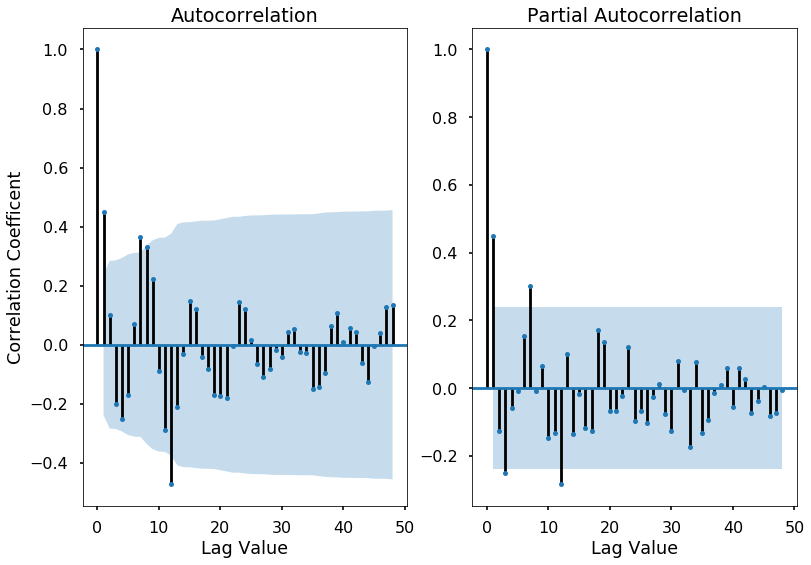

In [183]:
fig = plt.figure(figsize=[10, 20])
fig, ax = plt.subplots()
ax=plt.subplot(121)

plt.ylabel('Correlation Coefficent')
plt.xlabel('Lag Value')

#perform test on normalized and differentiated (stationary) data
#AutoCorrelation
sm.graphics.tsa.plot_acf(prices_month.prices_box_diff2[13:].values.squeeze(), lags=48, ax=ax)

ax=plt.subplot(122)
#Partial AutoCorrelation 

plt.xlabel('Lag Value')
sm.graphics.tsa.plot_pacf(prices_month.prices_box_diff2[13:].values.squeeze(), lags=48, ax=ax)





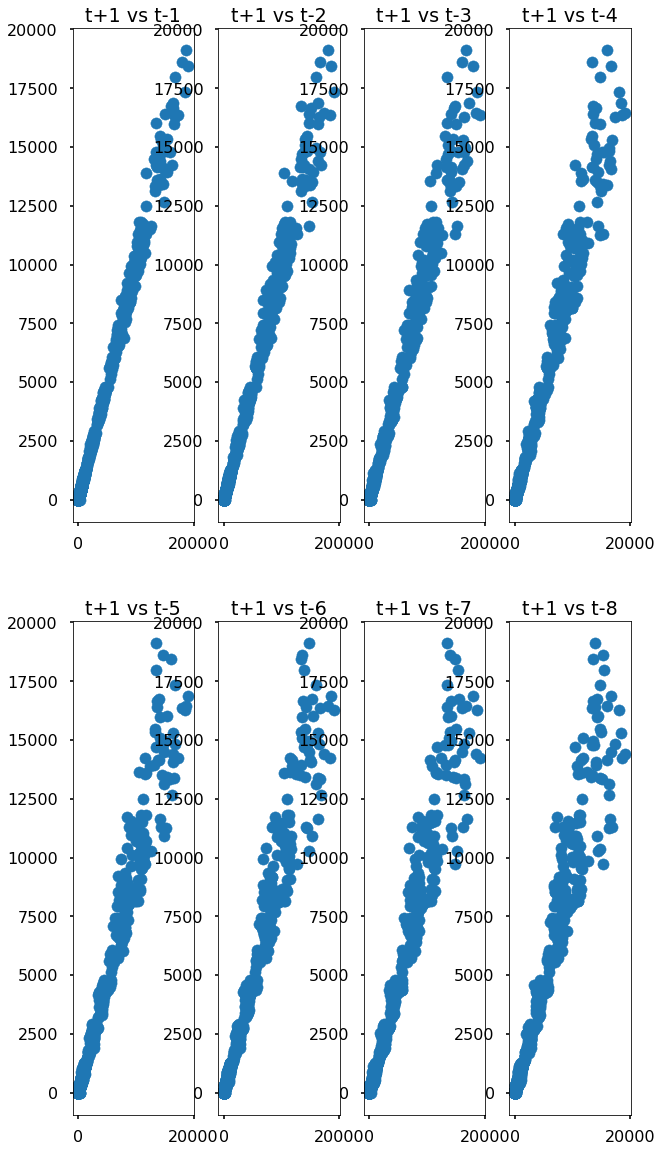

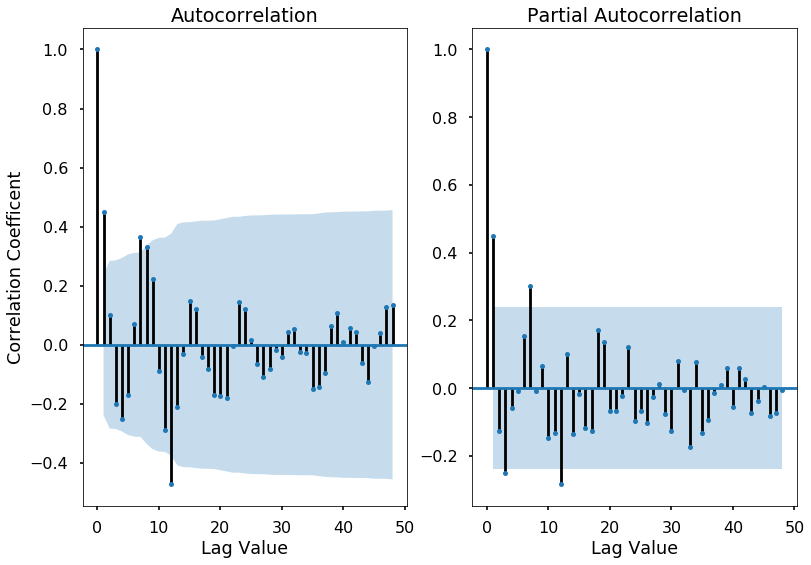

<Figure size 2160x2160 with 0 Axes>

In [184]:
fig = plt.figure(figsize=[30, 30])
from pandas import concat
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
values=prices['Weighted Price']
lags = 8
values = prices['Weighted Price'] #collected prices values 
columns = [values] #create list 
for i in range(1,(lags + 1)): #run for loop for 1 to 8 lag iterations/examinations
	columns.append(values.shift(i)) #shift the data according to each lag then add to the set
dataframe = concat(columns, axis=1) #concactinate all these columns 
columns = ['t+1']
for i in range(1,(lags + 1)):
 	columns.append('t-' + str(i)) #creats columns title t-(lag#)
dataframe.columns = columns #set as columns
pyplot.figure(1)
for i in range(1,(lags + 1)): # plot data
 	ax = pyplot.subplot(240 + i)
 	ax.set_title('t+1 vs t-' + str(i))
 	pyplot.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)

pyplot.show()


In [185]:
# plotly.tools.set_credentials_file(username='eddiem623', api_key='zKXYYDfk4jUzFP8RVBWV')
# import plotly.plotly as py
# import plotly.graph_objs as go


# trace1 = go.Scatter3d(
#     x=df['Date'],
#     y=df['Volume (BTC)'],
#     z=df['Close'],
#     mode='markers',
#     marker=dict(
#         size=12,
#         color=z,                # set color to an array/list of desired values
#         colorscale='Viridis',   # choose a colorscale
#         opacity=0.8
#     )
# )

# data = [trace1]
# layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
# )
# fig = go.Figure(data=data, layout=layout)
# py.iplot(fig, filename='3d-scatter-colorscale')
       

In [186]:
# import plotly.plotly as py
# import plotly.graph_objs as go

# import numpy as np


# trace1 = go.Scatter3d(
#     x=ether.date,
#     y=ether.volume,
#     z=ether.close,
#     mode='markers',
#     marker=dict(
#         size=12,
#         color=x,                # set color to an array/list of desired values
#         colorscale='Viridis',   # choose a colorscale
#         opacity=0.8
#     )
# )

# data = [trace1]
# layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
# )
# fig = go.Figure(data=data, layout=layout)
# py.iplot(fig, filename='3d-scatter-colorscale')

- ARIMA:Auto Regressive Integrated Moving Average 
- AutoRegressive- using past variable of time to predict future (lags of stationarized series)
- Integrated- Time series is differenced to be stationarized
- Moving Average- lags of forecast error  
- A stationary series has no trend, its variations around its mean have a constant amplitude, and it wiggles in a consistent fashion 
- Autocorrelations are the same for stationary data
- The ARIMA forecasting equation for a stationary time series is a linear (i.e., regression-type) equation in which the predictors consist of lags of the dependent variable and/or lags of the forecast errors
- PREDICTED Y= weight of previous values + weight of previous errors

Required Prior Knowledge:

-Box-Jenkins Model 



ARIMA(P,D,Q) model:
- used on random walk autoregressive models, exponential smoothing 
P= # of autoregressive terms (lag observations) 
D= # of nonseasonal differences needed for stationarity: how much differencing is occuring 
Q= # of lagged forecast errors [moving average window]

1. Identification: Of all the data, select a portion of the Model the best summarizes the data
    Is the data stationary, and how many differences are needed to make it stationary
    FOR Time Series: x3 x2 x1 
    
    ACF= True Corr of  x2 & x1 = (corr(x3,x2)) + PACF(X2,x1)
    PACF(X2,x1) = ACF- (corr(x3,x2))
    ACF- Corr(Observation, Lagged Observation)
    PACF- Corr(Observation, Lagged Observation) 
    
    Values that cross the 95% interval are significant 
    
    AR- if ACF has trail off, hard cutoff PACF (p) 
    MA- if PACF has trail off, hard cutoff ACF (q)

Stationary= statistical properties are all constant over time. 
    Autocorrleations (prior deviations from mean) are constant
    

    
    
    



In [187]:
#Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
parameters_list


[(0, 0, 0, 0),
 (0, 0, 0, 1),
 (0, 0, 1, 0),
 (0, 0, 1, 1),
 (0, 0, 2, 0),
 (0, 0, 2, 1),
 (0, 1, 0, 0),
 (0, 1, 0, 1),
 (0, 1, 1, 0),
 (0, 1, 1, 1),
 (0, 1, 2, 0),
 (0, 1, 2, 1),
 (0, 2, 0, 0),
 (0, 2, 0, 1),
 (0, 2, 1, 0),
 (0, 2, 1, 1),
 (0, 2, 2, 0),
 (0, 2, 2, 1),
 (1, 0, 0, 0),
 (1, 0, 0, 1),
 (1, 0, 1, 0),
 (1, 0, 1, 1),
 (1, 0, 2, 0),
 (1, 0, 2, 1),
 (1, 1, 0, 0),
 (1, 1, 0, 1),
 (1, 1, 1, 0),
 (1, 1, 1, 1),
 (1, 1, 2, 0),
 (1, 1, 2, 1),
 (1, 2, 0, 0),
 (1, 2, 0, 1),
 (1, 2, 1, 0),
 (1, 2, 1, 1),
 (1, 2, 2, 0),
 (1, 2, 2, 1),
 (2, 0, 0, 0),
 (2, 0, 0, 1),
 (2, 0, 1, 0),
 (2, 0, 1, 1),
 (2, 0, 2, 0),
 (2, 0, 2, 1),
 (2, 1, 0, 0),
 (2, 1, 0, 1),
 (2, 1, 1, 0),
 (2, 1, 1, 1),
 (2, 1, 2, 0),
 (2, 1, 2, 1),
 (2, 2, 0, 0),
 (2, 2, 0, 1),
 (2, 2, 1, 0),
 (2, 2, 1, 1),
 (2, 2, 2, 0),
 (2, 2, 2, 1)]

In [188]:
parameters_list[1]

(0, 0, 0, 1)

In [189]:
# Model Determination 
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list: #run through each grouping of parameters (54 total combos)
    try:
        model=sm.tsa.statespace.SARIMAX(prices_month.Weighted_Price_box, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 8)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

wrong parameters: (0, 0, 0, 0)
wrong parameters: (2, 1, 0, 0)
wrong parameters: (2, 1, 0, 1)
wrong parameters: (2, 1, 1, 0)
wrong parameters: (2, 1, 1, 1)
wrong parameters: (2, 1, 2, 0)
wrong parameters: (2, 1, 2, 1)


In [190]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

      parameters        aic
18  (1, 0, 0, 1)  90.808848
6   (0, 1, 0, 1)  90.904031
20  (1, 0, 1, 1)  92.383883
8   (0, 1, 1, 1)  92.507070
12  (0, 2, 0, 1)  92.570938
                                 Statespace Model Results                                
Dep. Variable:                Weighted_Price_box   No. Observations:                   80
Model:             SARIMAX(1, 1, 0)x(0, 1, 1, 8)   Log Likelihood                 -42.404
Date:                           Tue, 24 Apr 2018   AIC                             90.809
Time:                                   23:40:03   BIC                             97.955
Sample:                               09-30-2011   HQIC                            93.674
                                    - 04-30-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------

In [191]:
# Inverse Box-Cox Transformation Function
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))


In [192]:
df_month2 = prices_month[['Weighted Price']]
df_month2.head()
#columns=[]
#df_month2.Weighted_Price
prices_month.head()

,Weighted Price,Weighted_Price_box,prices_box_diff,prices_box_diff2
Date,,,,
2011-09-30,5.050355,1.729446,NaN,NaN
2011-10-31,2.725599,1.044149,NaN,NaN
2011-11-30,2.435673,0.922806,NaN,NaN
2011-12-31,3.375722,1.278005,NaN,NaN
2012-01-31,6.210285,1.966864,NaN,NaN


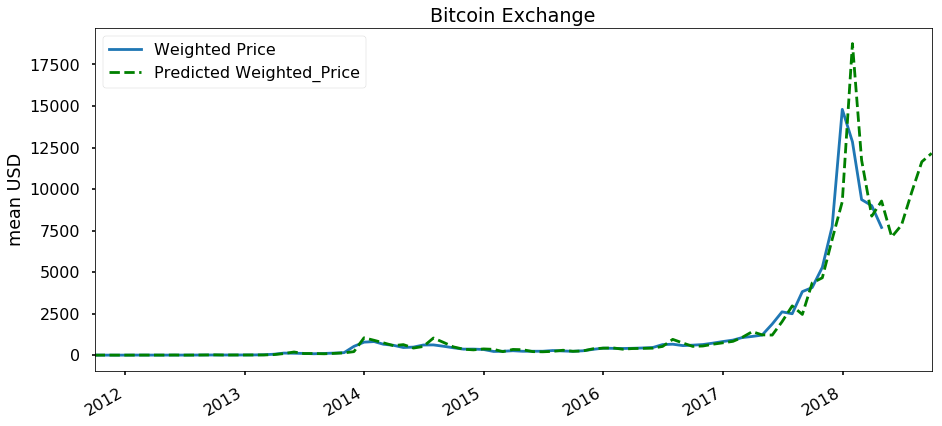

In [193]:
# Prediction
import datetime
from datetime import datetime

df_month2 = prices_month[['Weighted Price']]

# df_month2.reset_index

# d = pd.date_range(date.time(2011,9,30),datetime.now(), freq='D')
# d=df_month2.index
# df_month2

date_list = [datetime(2018, 3, 31), datetime(2018, 4, 30), datetime(2018, 5, 31), datetime(2018, 6, 30),
             datetime(2018, 7, 31),datetime(2018, 8, 31),datetime(2018, 9, 30)]
future = pd.DataFrame(index=date_list, columns= prices_month.columns)

df_month2 = pd.concat([df_month2, future])

df_month2['forecast'] = invboxcox(best_model.predict(start=0, end=150), lmbda)
plt.figure(figsize=(15,7))
plt.plot(df_month2['Weighted Price'])
df_month2.forecast.plot(color='green', ls='--', label='Predicted Weighted_Price')
plt.legend()
plt.title('Bitcoin Exchange')
plt.ylabel('mean USD')
plt.show()



In [194]:
from datetime import datetime
datetime.now()


datetime.datetime(2018, 4, 24, 23, 40, 4, 138302)